# Example 4: nx-Graph

This example demonstrates how to use the SIR_3S_to_nx_graph() of the SIR 3S Toolkit to generate a nx-Graph based on a SIR 3S model.

# SIR 3S Installation

In [1]:
SIR3S_SIRGRAF_DIR = r"C:\3S\SIR 3S Entwicklung\SirGraf-90-15-00-19_x64"

# Imports

Note: The SIR 3S Toolkit requires the Sir3S_Toolkit.dll included in SIR 3S installations (version Quebec and higher).

In [2]:
import sir3stoolkit

The core of sir3stoolkit is a Python wrapper around basic functionality of SIR 3S, offering a low-level access to the creation, modification and simulation of SIR 3S models. In the future pure python subpackages may be added.

In [3]:
from sir3stoolkit.core import wrapper

In [4]:
from sir3stoolkit.mantle import mantle

In [5]:
sir3stoolkit

<module 'sir3stoolkit' from 'C:\\Users\\aUsername\\3S\\sir3stoolkit\\src\\sir3stoolkit\\__init__.py'>

The wrapper package has to be initialized with reference to a SIR 3S (SirGraf) installation.

In [6]:
wrapper.Initialize_Toolkit(SIR3S_SIRGRAF_DIR)

### Additional imports

In [31]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Initialization

In [32]:
s3s = mantle.Mantle_SIR3S_Model()

Initialization complete


# Open Model

In [33]:
dbFilePath=r"C:\Users\aUsername\3S\Quebec_PT3S\Example5.db3"

In [34]:
s3s.OpenModel(dbName=dbFilePath,
              providerType=s3s.ProviderTypes.SQLite,
              Mid="M-1-0-1",
              saveCurrentlyOpenModel=False,
              namedInstance="",
              userID="",
              password="")

Model is open for further operation


# Generate nx Graph

In [35]:
G=s3s.SIR_3S_to_nx_graph()

[2025-10-24 17:48:00,778] INFO in sir3stoolkit.mantle.alternative_models: [graph] Building nx graph...
[2025-10-24 17:48:00,781] INFO in sir3stoolkit.mantle.dataframes: [metadata] Generating metadata dataframe for element type: ObjectTypes.Node
[2025-10-24 17:48:00,785] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieved 1559 element(s) of element type ObjectTypes.Node.
[2025-10-24 17:48:00,788] INFO in sir3stoolkit.mantle.dataframes: [Resolving Metadata Properties] No properties given → using ALL metadata properties for ObjectTypes.Node.
[2025-10-24 17:48:00,790] DEBUG in sir3stoolkit.mantle.dataframes: [Resolving Metadata Properties] Using 38 metadata properties.
[2025-10-24 17:48:00,791] INFO in sir3stoolkit.mantle.dataframes: [metadata] Retrieving metadata properties ['Name', 'Ktyp', 'Zkor', 'QmEin', 'Lfakt', 'Fkpzon', 'Fkfstf', 'Fkutmp', 'Fkfqps', 'Fkcont', 'Fk2lknot', 'Beschreibung', 'Idreferenz', 'Iplanung', 'Kvr', 'Qakt', 'Xkor', 'Ykor', 'NodeNamePosition', 'ShowNodeNa

# View generated Graph

## Node and Edge Attributes

In [36]:
node_attrs = {n: data for n, data in G.nodes(data=True)}

In [38]:
edge_attrs = {(u, v): data for u, v, data in G.edges(data=True)}

## Connected ?

In [40]:
nx.is_weakly_connected(G) # Is connected as an undirected graph

True

## Plot

In [41]:
def plot_nx_graph(G, main_container):
    # Extract node positions from geometry and filter by Fkcont
    pos = {
        node_id: (data['geometry'].x, data['geometry'].y)
        for node_id, data in G.nodes(data=True)
        if 'geometry' in data and hasattr(data['geometry'], 'x') and hasattr(data['geometry'], 'y')
        and data.get('Fkcont') == main_container
    }

    # Extract edges with valid geometry and both nodes in pos
    edges = [
        (u, v, data) for u, v, data in G.edges(data=True)
        if u in pos and v in pos and 'geometry' in data and data['geometry'].geom_type != 'Point'
    ]

    # Plot
    plt.figure(figsize=(20, 14))
    for _, _, data in edges:
        geom = data['geometry']
        x, y = geom.xy
        plt.plot(x, y, color='black', linewidth=1)

    # Only draw nodes that have positions
    nx.draw_networkx_nodes(G, pos=pos, nodelist=list(pos.keys()), node_color='black', node_size=10)
    plt.title(f"nx-Graph'{main_container}'")
    plt.axis('equal')
    plt.show()

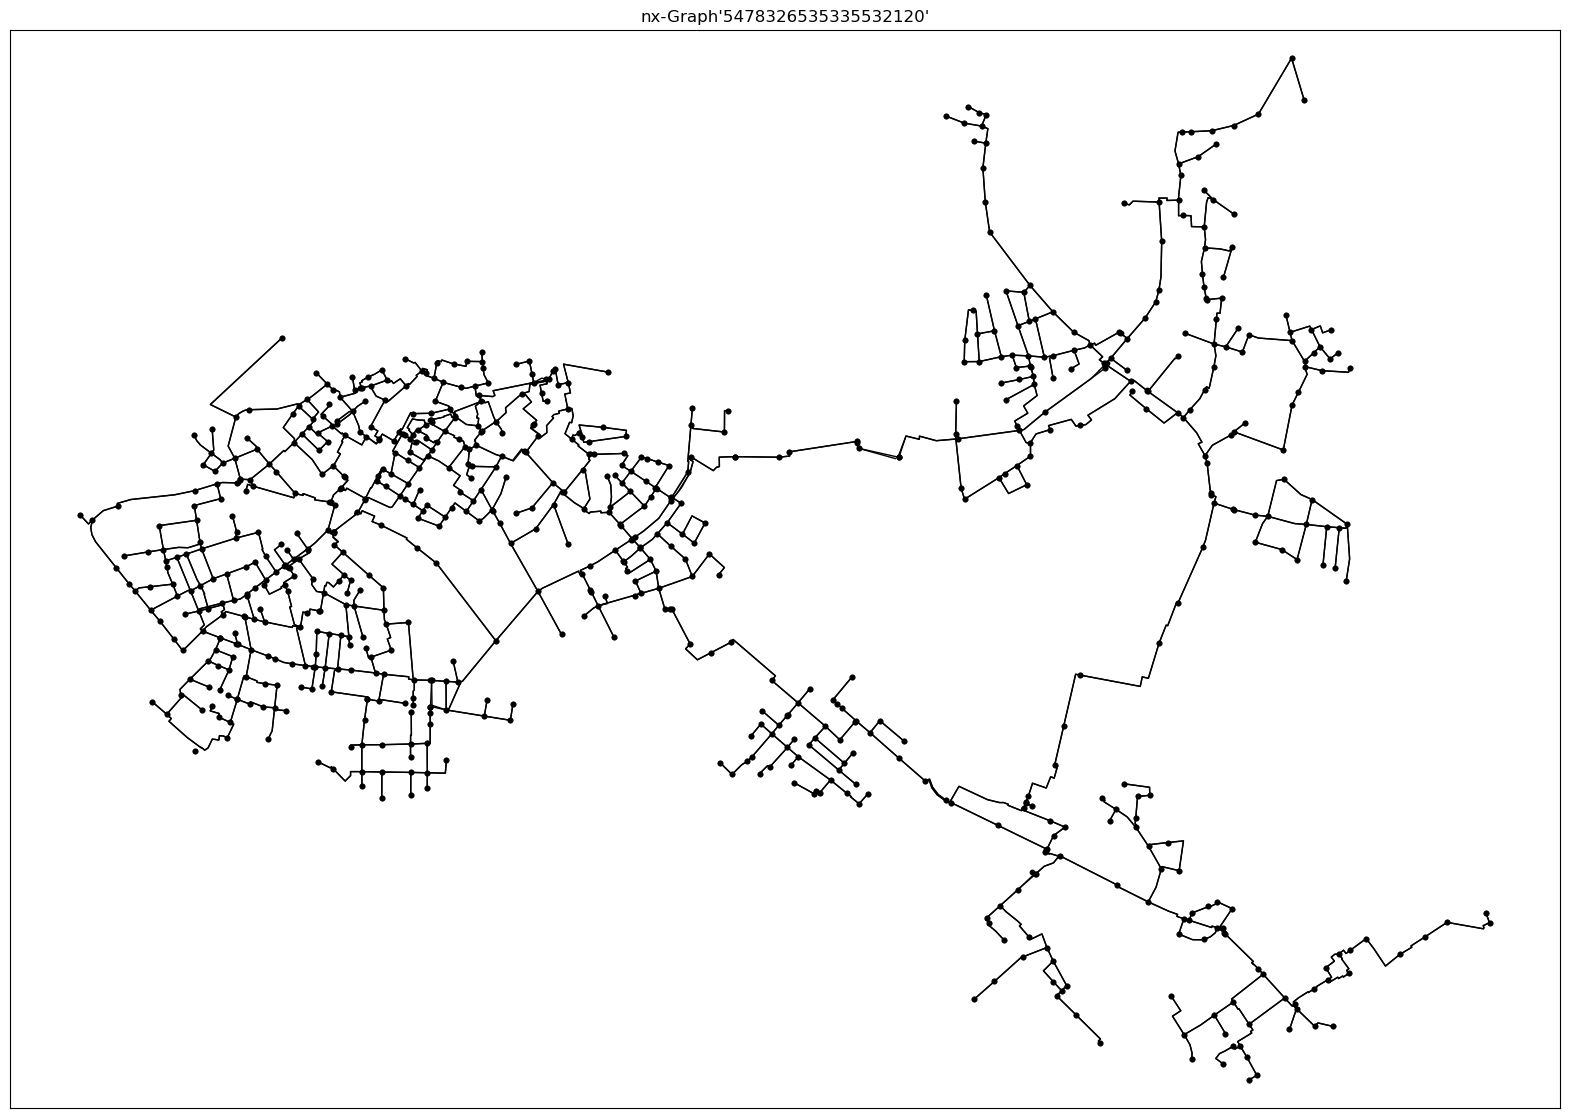

In [42]:
plot_nx_graph(G, s3s.GetMainContainer()[0])